<a href="https://colab.research.google.com/github/sahajagarwal90/ARIMA-And-Seasonal-ARIMA/blob/master/Cifar_10_with_dropout_without_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batch_size= 32
num_classes = 10
epochs = 100
num_predictions = 20

In [3]:
# Data split between train and test sets
(x_train,y_train), (x_test,y_test)= cifar10.load_data()
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

170508288/170498071 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


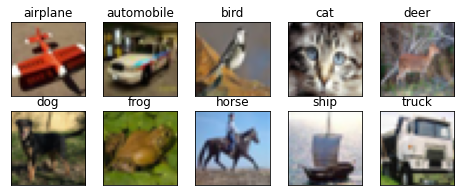

In [5]:
#plotting some random 10 images

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig= plt.figure(figsize=(8,3))
for i in range(num_classes):
  ax= fig.add_subplot(2,5, 1+i, xticks=[],yticks=[])
  idx=np.where(y_train[:]==i)[0]
  features_idx=x_train[idx, ::]
  img_num=np.random.randint(features_idx.shape[0])
  im= (features_idx[img_num,::])
  ax.set_title(class_names[i])
  plt.imshow(im)
plt.show()


In [7]:
# convert class vectors to binary class matrices

y_train = keras.utils.np_utils.to_categorical(y_train,num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test,num_classes)

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding ='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),padding ='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [12]:
# initiate RMSprop optimizer
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.01,decay=1e-6)


#Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

x_train =x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255


In [13]:
model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/100
1563/1563 [==============================] - 21s 5ms/step - loss: 2.0921 - accuracy: 0.2257 - val_loss: 1.9905 - val_accuracy: 0.2903
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8307 - accuracy: 0.3385 - val_loss: 1.6170 - val_accuracy: 0.4254
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6180 - accuracy: 0.4115 - val_loss: 1.4836 - val_accuracy: 0.4705
Epoch 4/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4693 - accuracy: 0.4669 - val_loss: 1.3500 - val_accuracy: 0.5156
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3769 - accuracy: 0.5042 - val_loss: 1.3234 - val_accuracy: 0.5302
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3104 - accuracy: 0.5279 - val_loss: 1.2038 - val_accuracy: 0.5678
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2540 - accuracy: 0.5515 - val_loss: 1.1280 - val_a